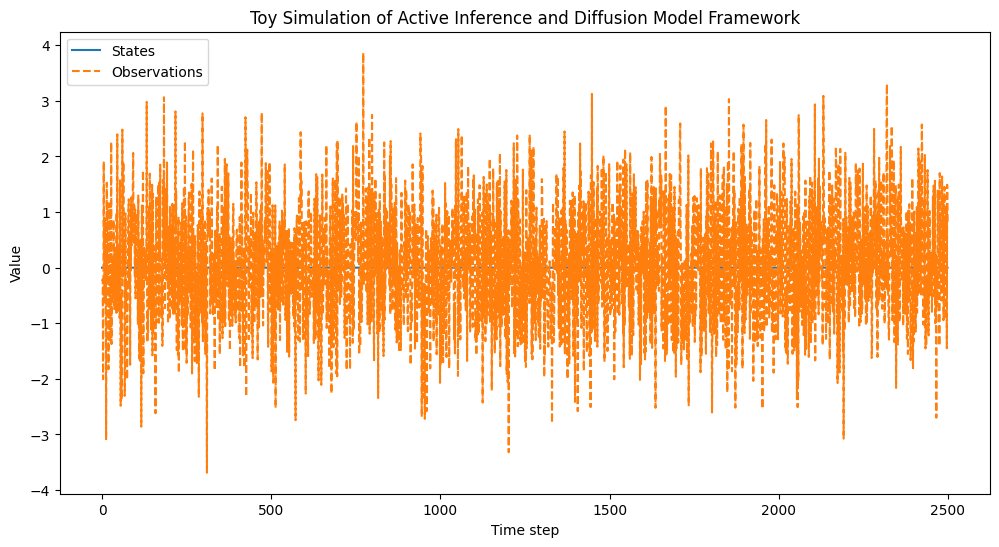

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple environment with states and a linear policy
class SimpleEnvironment:
    def __init__(self):
        self.state = 0

    def step(self, action):
        """Apply action and return new state and observation."""
        self.state += action  # In this toy example, the new state is just the old state plus the action
        observation = self.state + np.random.randn()  # Add some noise to the state to generate observation
        return self.state, observation

# Initialize environment, policy, score networks (represented as functions)
environment = SimpleEnvironment()
policy = lambda state: -0.1 * state  # A simple linear policy
score_network_state = lambda state, policy_params: 1  # Dummy score network for state
score_network_policy = lambda policy_params: 1  # Dummy score network for policy

# Simulation parameters
n_iterations = 2500

# Run the simulation
states, observations = [], []
for _ in range(n_iterations):
    current_state = environment.state
    action = policy(current_state)  # Select action according to policy
    new_state, observation = environment.step(action)  # Apply action in the environment
    states.append(new_state)
    observations.append(observation)
    
    # Update score networks (dummy update)
    score_network_state(new_state, policy)  # Update score network for the state
    score_network_policy(policy)  # Update score network for the policy
    
    # Update policy (dummy update)
    # In practice, this would involve gradient descent using the score networks, but here we'll keep it simple

# Plot the results of the simulation
plt.figure(figsize=(12, 6))
plt.plot(states, label='States')
plt.plot(observations, label='Observations', linestyle='--')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.title('Toy Simulation of Active Inference and Diffusion Model Framework')
plt.show()


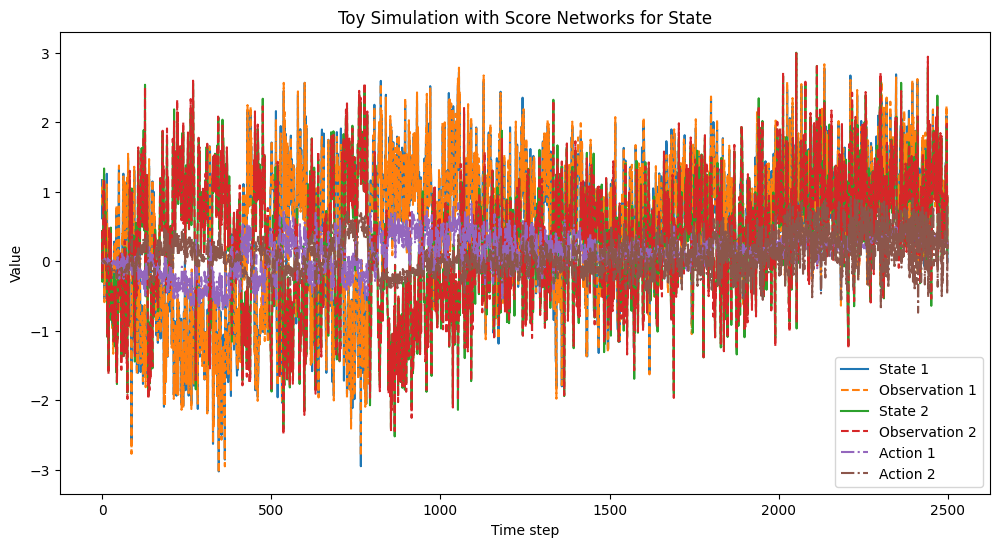

In [16]:
# Let's complexify the environment and policy update mechanism

class ComplexEnvironment:
    def __init__(self, state_dim, action_dim):
        self.state = np.zeros(state_dim)
        self.action_dim = action_dim

    def step(self, action):
        # Simple nonlinear dynamics with noise
        self.state = np.sin(self.state) + action + np.random.normal(scale=0.5, size=self.state.shape)
        observation = self.state + np.random.normal(scale=0.1, size=self.state.shape)
        return self.state, observation

# Define a simple neural network-like structure for the policy
class SimpleNeuralPolicy:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(output_dim, input_dim) * 0.01
        self.bias = np.random.randn(output_dim) * 0.01
    
    def __call__(self, state):
        return np.tanh(self.weights @ state + self.bias)

    def update(self, grad_weights, grad_bias, lr=0.01):
        self.weights -= lr * grad_weights
        self.bias -= lr * grad_bias

# Initialize environment and policy
state_dim = 2
action_dim = 2
environment = ComplexEnvironment(state_dim=state_dim, action_dim=action_dim)
policy = SimpleNeuralPolicy(input_dim=state_dim, output_dim=action_dim)

# Define dummy score networks as simple gradient descent optimizers
def update_score_network_state(state, policy_params):
    # Return a dummy gradient for updating policy weights
    return np.random.randn(*policy.weights.shape), np.random.randn(*policy.bias.shape)

# Run the complex simulation
n_iterations = 250

states, observations, actions = [], [], []
for _ in range(n_iterations):
    current_state = environment.state
    current_action = policy(current_state)
    new_state, observation = environment.step(current_action)
    
    # Collect data for plotting
    states.append(new_state)
    observations.append(observation)
    actions.append(current_action)
    
    # Update score network and policy
    grad_weights, grad_bias = update_score_network_state(new_state, policy.weights)
    policy.update(grad_weights, grad_bias)

# Convert lists to numpy arrays for plotting
states = np.array(states)
observations = np.array(observations)
actions = np.array(actions)

# Plot the results of the complex simulation
plt.figure(figsize=(12, 6))

# Plot states and observations
for i in range(state_dim):
    plt.plot(states[:, i], label=f'State {i+1}')
    plt.plot(observations[:, i], label=f'Observation {i+1}', linestyle='--')

# Plot actions taken at each step
for i in range(action_dim):
    plt.plot(actions[:, i], label=f'Action {i+1}', linestyle='-.')
    
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.title('Toy Simulation with Score Networks for State')
plt.show()


In [1]:
# Define a more complex environment, policy, and score networks according to the algorithm provided

class ComplexEnvironment:
    def __init__(self, state_dim, action_dim):
        self.state = np.zeros(state_dim)
        self.action_dim = action_dim

    def step(self, action):
        self.state = np.sin(self.state) + action + np.random.normal(scale=0.5, size=self.state.shape)
        observation = self.state + np.random.normal(scale=0.1, size=self.state.shape)
        return self.state, observation

class NeuralPolicy:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(output_dim, input_dim) * 0.01
        self.bias = np.random.randn(output_dim) * 0.01

    def __call__(self, state):
        return np.tanh(self.weights @ state + self.bias)

    def update(self, grad_weights, grad_bias, lr=0.01):
        self.weights -= lr * grad_weights
        self.bias -= lr * grad_bias

class ScoreNetworkState:
    def __init__(self, input_dim):
        self.params = np.random.randn(input_dim) * 0.01

    def compute_gradient(self, state):
        # Dummy gradient computation for simplicity
        return -state + np.random.normal(scale=0.1, size=state.shape)

    def update(self, gradient, lr=0.01):
        self.params -= lr * gradient

class ScoreNetworkPolicy:
    def __init__(self, weight_dim, bias_dim):
        self.weight_params = np.random.randn(*weight_dim) * 0.01
        self.bias_params = np.random.randn(*bias_dim) * 0.01

    def compute_gradient(self, state):
        # Dummy gradient computation for simplicity
        grad_weights = np.random.randn(*self.weight_params.shape)
        grad_bias = np.random.randn(*self.bias_params.shape)
        return grad_weights, grad_bias

    def update(self, grad_weights, grad_bias, lr=0.01):
        self.weight_params -= lr * grad_weights
        self.bias_params -= lr * grad_bias


# Initialize environment, policy, and score networks
state_dim = 2
action_dim = 2
environment = ComplexEnvironment(state_dim=state_dim, action_dim=action_dim)
policy = NeuralPolicy(input_dim=state_dim, output_dim=action_dim)
score_network_state = ScoreNetworkState(input_dim=state_dim)
score_network_policy = ScoreNetworkPolicy(policy.weights.shape, policy.bias.shape)

# Simulation parameters
n_iterations = 250

# Run the simulation with the corrected score networks
states, observations, actions = [], [], []
for _ in range(n_iterations):
    current_state = environment.state
    current_action = policy(current_state)
    new_state, observation = environment.step(current_action)

    # Collect data for plotting
    states.append(new_state)
    observations.append(observation)
    actions.append(current_action)
    
    # Update state score network
    state_gradient = score_network_state.compute_gradient(new_state)
    score_network_state.update(state_gradient, lr=0.01)

    # Update policy score network
    grad_weights, grad_bias = score_network_policy.compute_gradient(new_state)
    score_network_policy.update(grad_weights, grad_bias, lr=0.01)
    policy.update(grad_weights, grad_bias, lr=0.01)

# Convert lists to numpy arrays for plotting
states = np.array(states)
observations = np.array(observations)
actions = np.array(actions)

# Plot the results with the corrected score network updates
plt.figure(figsize=(14, 7))

for i in range(state_dim):
    plt.plot(states[:, i], label=f'State {i+1}')
    plt.plot(observations[:, i], label=f'Observation {i+1}', linestyle='--')

for i in range(action_dim):
    plt.plot(actions[:, i], label=f'Action {i+1}', linestyle='-.')
    
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.title('Toy Simulation with Score Networks for State and Policy')
plt.show()



NameError: name 'np' is not defined

In [11]:
actions

array([[ 0.00091175, -0.00224486],
       [-0.00843568,  0.00214962],
       [-0.01262382,  0.00566535],
       ...,
       [ 0.02857076, -0.30417493],
       [-0.07060752, -0.42748167],
       [-0.44902231, -0.80643134]])